In [2]:
it1 = (chr(ord('a')+i) for i in range(0, 10))
it2 = (i for i in range(0, 8))
for i, it in enumerate(zip(it1, it2)):
    print(i, it)

0 ('a', 0)
1 ('b', 1)
2 ('c', 2)
3 ('d', 3)
4 ('e', 4)
5 ('f', 5)
6 ('g', 6)
7 ('h', 7)


In [45]:
import numpy as np 

for i in range(0, 5):
    try:
        ## 5칸 짜리 리스트에 리스트의 크기를 넘는 값으로 indexing하므로 
        ## IndexError가 에러가 발생할 수 있음 
        [1,2,3,4,5][np.random.randint(0, 9)] ## raise IndexError
        open("ddd", 'r') ## raise FileNotFoundError
        print('try 구문 실행됨')
    except IndexError as e1:
        print("error: <{}> 발생했고, except 문 실행됨".format(e1))
    except FileNotFoundError as e2:
        print("error: <{}> 발생했고, except 문 실행됨".format(e2))
    finally:
        print('try, except구문 시행후 무조건 시행됨 ')
        print("="*30)

error: <[Errno 2] No such file or directory: 'ddd'> 발생했고, except 문 실행됨
try, except구문 시행후 무조건 시행됨 
error: <[Errno 2] No such file or directory: 'ddd'> 발생했고, except 문 실행됨
try, except구문 시행후 무조건 시행됨 
error: <[Errno 2] No such file or directory: 'ddd'> 발생했고, except 문 실행됨
try, except구문 시행후 무조건 시행됨 
error: <list index out of range> 발생했고, except 문 실행됨
try, except구문 시행후 무조건 시행됨 
error: <[Errno 2] No such file or directory: 'ddd'> 발생했고, except 문 실행됨
try, except구문 시행후 무조건 시행됨 


In [46]:
open("ddd", 'r') ## raise FileNotFoundError

FileNotFoundError: [Errno 2] No such file or directory: 'ddd'

In [84]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np 

G = nx.complete_graph(15)
for i in range(0, 150):
    n1 = list(G.nodes())[np.random.randint(0, len(G.nodes()))]
    n2 = list(G.nodes())[np.random.randint(0, len(G.nodes()))]
    try:
        G.remove_edge(n1, n2)
    except:
        continue

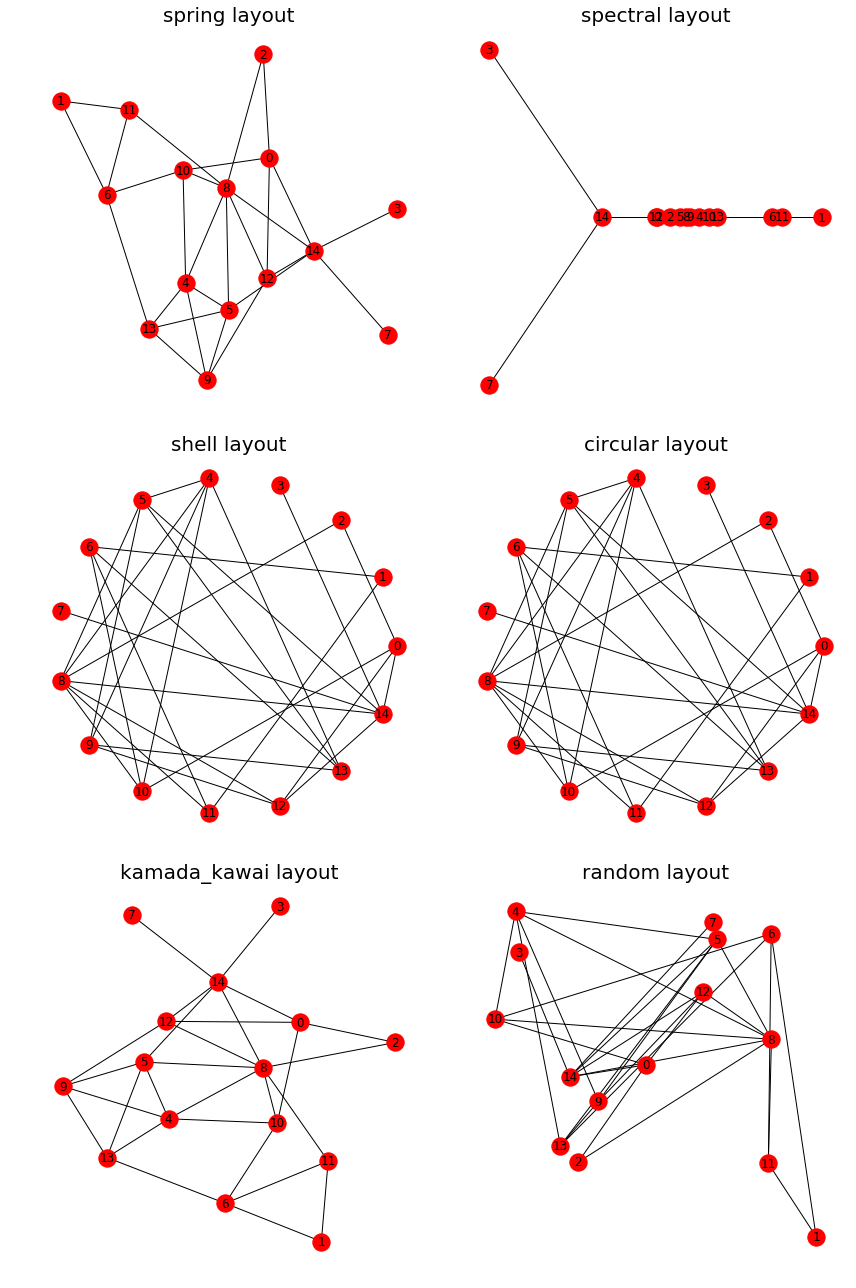

In [113]:
f, axes = plt.subplots(3, 2)
f.set_size_inches((12, 18)) 
## layout 설정 
layouts = {'spring': nx.spring_layout(G), 
           'spectral':nx.spectral_layout(G), 
           'shell':nx.shell_layout(G), 
           'circular':nx.circular_layout(G),
           'kamada_kawai':nx.kamada_kawai_layout(G), 
           'random':nx.random_layout(G)
          }
## 각 axis마다 그림을 따로 그려줌
for i, kv in enumerate(layouts.items()):
    title, pos, ax = kv[0], kv[1], axes[i//2][i%2]
    nx.draw_networkx(G, kv[1], ax=ax)
    ax.set_title("{} layout".format(title), fontsize=20)
    ax.axis('off')
plt.tight_layout()
plt.savefig('../../assets/images/markdown_img/180807_nx_layout_comp.svg')
plt.show()

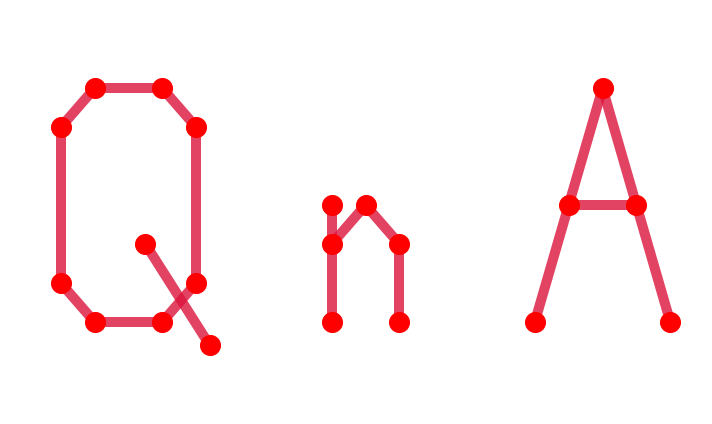

In [114]:
""" QnA를 네트워크로 그려줌 """
import networkx as nx

QnA = nx.Graph()
## Q
QnA.add_nodes_from(["Q{}".format(i) for i in range(0, 8)])
QnA.add_edges_from([("Q{}".format(i), "Q{}".format(i+1) ) for i in range(0, 7)]), QnA.add_edge('Q0', 'Q7')
QnA.add_nodes_from(['Q8', 'Q9']), QnA.add_edge('Q8', 'Q9') 

## A
QnA.add_nodes_from(["A{}".format(i) for i in range(0, 5)])
QnA.add_edges_from([('A0', 'A1'), ('A0', 'A2'), ('A2', 'A1'), ('A3', 'A1'), ('A2', 'A4')])

## n
QnA.add_nodes_from(['n{}'.format(i) for i in range(0, 6)])
QnA.add_edges_from([('n0', 'n1'), ('n1', 'n2'), ('n1', 'n3'), ('n3', 'n4'), ('n4', 'n5')])

## network의 좌표는 다음처럼 key=> node name, value=> (x, y) 로 넘겨주면 됨 
pos = {'Q0':[0, 0], 'Q1':[1, 0], 'Q2':[1.5, -0.5], 'Q3':[1.5, -2.5], 
       'Q4':[1, -3], 'Q5':[0, -3], 'Q6':[-0.5, -2.5], 'Q7':[-0.5, -0.5],
       'Q8':[0.75, -2], 'Q9':[1.7, -3.3],
       'n0':[3.5, -1.5], 'n1':[3.5, -2.0], 'n2':[3.5, -3], 'n3':[4.0, -1.5], 'n4':[4.5, -2.0], 'n5':[4.5, -3], 
       'A0':[7.5, 0], 'A1': [7.0, -1.5], 'A2': [8.0, -1.5], 'A3':[6.5, -3], 'A4':[8.5, -3], 
      }

plt.figure(figsize=(10, 6))
plt.ylim(-4.0, 1.0)
nx.draw_networkx_nodes(QnA, pos, node_size=400, alpha=1.0, 
                       node_shape='o', node_color='red')
nx.draw_networkx_edges(QnA, pos, width=10, alpha=0.8, edge_color='crimson')
plt.axis('off')
plt.tight_layout()
plt.savefig('../../assets/images/markdown_img/180807_qna.svg')
plt.show()

In [ ]:
## 네트워크의 레이아웃으로 그림을 보여주고 싶은데 
import networkx as nx

QnA = nx.Graph()

## Q
QnA.add_nodes_from(["Q{}".format(i) for i in range(0, 8)])
QnA.add_edges_from([("Q{}".format(i), "Q{}".format(i+1) ) for i in range(0, 7)]), QnA.add_edge('Q0', 'Q7')
QnA.add_nodes_from(['Q8', 'Q9']), QnA.add_edge('Q8', 'Q9') 

## A
QnA.add_nodes_from(["A{}".format(i) for i in range(0, 5)])
QnA.add_edges_from([('A0', 'A1'), ('A0', 'A2'), ('A2', 'A1'), ('A3', 'A1'), ('A2', 'A4')])

## n
QnA.add_nodes_from(['n{}'.format(i) for i in range(0, 6)])
QnA.add_edges_from([('n0', 'n1'), ('n1', 'n2'), ('n1', 'n3'), ('n3', 'n4'), ('n4', 'n5')])

pos = {'Q0':[0, 0], 'Q1':[1, 0], 'Q2':[1.5, -0.5], 'Q3':[1.5, -2.5], 
       'Q4':[1, -3], 'Q5':[0, -3], 'Q6':[-0.5, -2.5], 'Q7':[-0.5, -0.5],
       'Q8':[0.75, -2], 'Q9':[1.7, -3.3],
       'n0':[3.5, -1.5], 'n1':[3.5, -2.0], 'n2':[3.5, -3], 'n3':[4.0, -1.5], 'n4':[4.5, -2.0], 'n5':[4.5, -3], 
       'A0':[7.5, 0], 'A1': [7.0, -1.5], 'A2': [8.0, -1.5], 'A3':[6.5, -3], 'A4':[8.5, -3], 
      }

plt.figure(figsize=(10, 6))
plt.ylim(-4.0, 1.0)
nx.draw_networkx_nodes(QnA, pos, node_size=400, alpha=1.0, 
                       node_shape='o', node_color='red')
nx.draw_networkx_edges(QnA, pos, width=10, alpha=0.8, edge_color='crimson')
plt.axis('off')
plt.tight_layout()
#plt.savefig('../../assets/images/markdown_img/180807_qna.png', dpi=200)
plt.show()